Running simulation for thickness 0.50 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=242.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=243.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 9.8162e-01 ± 5.3333e-03, Neutron: 9.5165e-01 ± 9.0704e-02
Running simulation for thickness 3.63 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=248.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=249.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 7.6158e-01 ± 4.9162e-03, Neutron: 6.6495e-01 ± 8.3942e-02
Running simulation for thickness 6.76 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=254.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=255.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 4.9077e-01 ± 4.0896e-03, Neutron: 4.6322e-01 ± 5.9941e-02
Running simulation for thickness 9.89 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=260.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=261.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 2.9460e-01 ± 2.4742e-03, Neutron: 3.1073e-01 ± 5.0803e-02
Running simulation for thickness 13.03 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=266.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=267.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 1.7450e-01 ± 2.3172e-03, Neutron: 1.7598e-01 ± 2.8179e-02
Running simulation for thickness 16.16 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=272.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=273.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 1.0105e-01 ± 2.3473e-03, Neutron: 1.2202e-01 ± 1.9591e-02
Running simulation for thickness 19.29 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=278.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=279.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 5.8908e-02 ± 2.0256e-03, Neutron: 7.6696e-02 ± 1.6257e-02
Running simulation for thickness 22.42 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=284.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=285.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 3.5124e-02 ± 1.3499e-03, Neutron: 3.4985e-02 ± 1.3234e-02
Running simulation for thickness 25.55 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=290.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=291.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 2.0405e-02 ± 1.1912e-03, Neutron: 1.7493e-02 ± 7.9178e-03
Running simulation for thickness 28.68 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=296.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=297.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 1.2218e-02 ± 6.0809e-04, Neutron: 2.0349e-02 ± 7.7609e-03
Running simulation for thickness 31.82 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=302.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=303.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 7.9174e-03 ± 4.9960e-04, Neutron: 5.7471e-03 ± 3.8630e-03
Running simulation for thickness 34.95 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=308.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=309.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 4.8910e-03 ± 2.9253e-04, Neutron: 2.8736e-03 ± 2.8841e-03
Running simulation for thickness 38.08 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=314.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=315.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 2.9459e-03 ± 2.5973e-04, Neutron: 5.7471e-03 ± 3.8649e-03
Running simulation for thickness 41.21 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=320.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=321.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 1.8107e-03 ± 2.2099e-04, Neutron: 5.7471e-03 ± 3.8649e-03
Running simulation for thickness 44.34 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=326.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=327.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 9.7292e-04 ± 1.7193e-04, Neutron: 5.7471e-03 ± 3.8649e-03
Running simulation for thickness 47.47 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=332.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=333.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 6.4865e-04 ± 1.0036e-04, Neutron: 5.7471e-03 ± 3.8649e-03
Running simulation for thickness 50.61 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=338.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=339.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 4.8645e-04 ± 1.0508e-04, Neutron: 2.8736e-03 ± 2.8847e-03
Running simulation for thickness 53.74 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=344.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=345.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 2.7023e-04 ± 8.0577e-05, Neutron: 2.8736e-03 ± 2.8847e-03
Running simulation for thickness 56.87 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=350.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=351.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 1.8917e-04 ± 7.0360e-05, Neutron: 2.8736e-03 ± 2.8847e-03
Running simulation for thickness 60.00 cm


/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=356.
  warn(msg, IDWarning)
/home/ahmed/.local/lib/python3.13/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=357.
  warn(msg, IDWarning)


  Completed: Transmission factors - Photon: 1.3512e-04 ± 6.0432e-05, Neutron: 0.0000e+00 ± 0.0000e+00

Photon Attenuation Coefficient (59.5 keV in Al): 0.156230 cm⁻¹
R² value for photon fit: 0.9983
Neutron Attenuation Coefficient (0.025 eV in Al): 0.111212 cm⁻¹
R² value for neutron fit: 0.9068

=== Comparison with Theoretical Values ===
Photon (59.5 keV):
  Calculated: 0.156230 cm⁻¹
  Theoretical: 0.750060 cm⁻¹
  Relative difference: 79.17%

Neutron (0.025 eV):
  Calculated: 0.111212 cm⁻¹
  Theoretical: 0.100000 cm⁻¹
  Relative difference: 11.21%

=== Derived Shielding Parameters ===
Photon Half-Value Layer (HVL): 4.4367 cm
Photon Tenth-Value Layer (TVL): 14.7384 cm
Neutron Half-Value Layer (HVL): 6.2327 cm
Neutron Tenth-Value Layer (TVL): 20.7045 cm


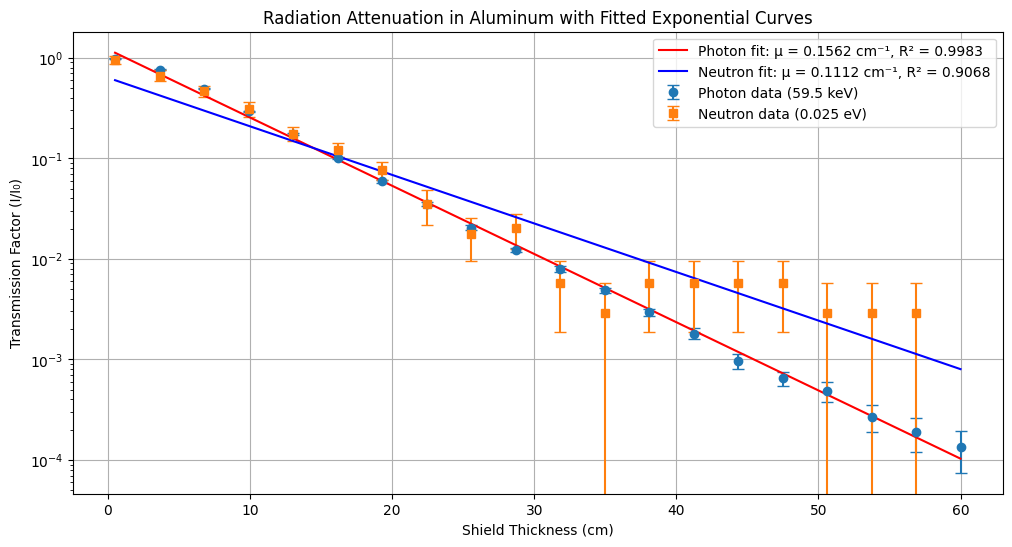

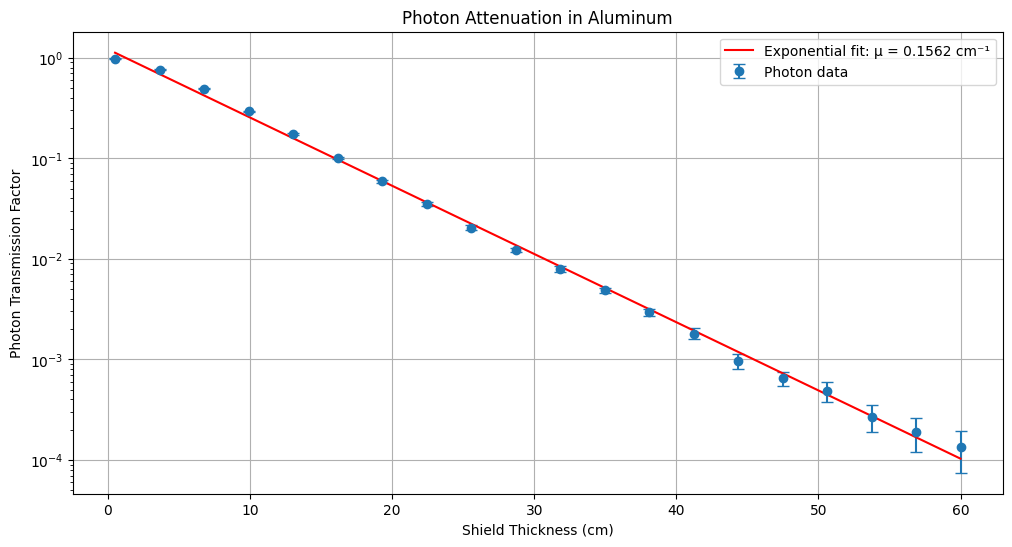

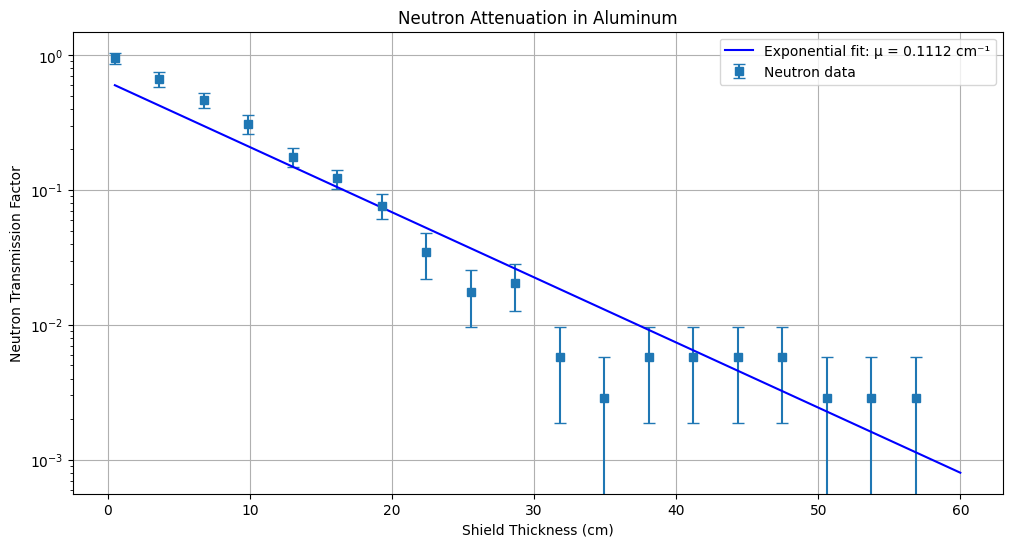

Simulation complete. Results saved in /home/ahmed/Downloads/Modelling/TermProject/shield_results/run_t_60.0cm/shield_results


In [6]:
# OpenMC Simulation: Shielding Thickness Sweep for Am-241 with Dual Radiation Sources

import openmc
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import shutil

# This points to the directory of ENDF/B-VIII cross_sections.xml
# Adjust this path to match your cross sections location
try:
    openmc.config["cross_sections"] = "/home/ahmed/nndc_hdf5/cross_sections.xml"
except:
    # If you're running in a different environment, you might need to set this differently
    # For example with OPENMC_CROSS_SECTIONS environment variable
    pass

# Define materials
def create_materials():
    am241 = openmc.Material(name='Am-241')
    am241.set_density('g/cm3', 13.67)
    am241.add_nuclide('Am241', 1.0)

    aluminum = openmc.Material(name='Aluminum')
    aluminum.set_density('g/cm3', 2.7)
    aluminum.add_element('Al', 1.0)

    cdte = openmc.Material(name='CdTe Detector')
    cdte.set_density('g/cm3', 6.2)
    cdte.add_element('Cd', 0.5)
    cdte.add_element('Te', 0.5)
    
    # Add void material (air)
    air = openmc.Material(name='Air')
    air.set_density('g/cm3', 0.001205)
    air.add_element('N', 0.78)
    air.add_element('O', 0.21)
    air.add_element('Ar', 0.01)
    
    # Set S(α,β) thermal scattering data for aluminum
    # This is important for accurate thermal neutron interactions but it doesn't exist in my local library
    '''try:
        aluminum.add_s_alpha_beta('c_Al_in_Al')
    except:
        print("Warning: Could not add S(α,β) data for aluminum. Thermal neutron scattering may be less accurate.")
    '''
    return openmc.Materials([am241, aluminum, cdte, air])

# Initialize dataframe for results
results = []
thicknesses = np.linspace(0.5, 60.0, num=20)  # cm

# Create base directory for runs if it doesn't exist
base_dir = os.getcwd()
results_dir = os.path.join(base_dir, "shield_results")
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

for t in thicknesses:
    print(f"Running simulation for thickness {t:.2f} cm")
    
    # Create run directory
    run_dir = os.path.join(results_dir, f"run_t_{t:.1f}cm")
    if os.path.exists(run_dir):
        shutil.rmtree(run_dir)
    os.makedirs(run_dir)
    os.chdir(run_dir)

    # Create materials
    materials = create_materials()
    materials.export_to_xml()

    # Define surfaces with more generous boundaries
    # Source is at origin, shield starts at x=2cm, detector follows shield
    source_box_min = openmc.XPlane(x0=0.0, boundary_type='transmission')
    source_box_max = openmc.XPlane(x0=1.0, boundary_type='transmission')
    shield_min = openmc.XPlane(x0=2.0, boundary_type='transmission')
    shield_max = openmc.XPlane(x0=2.0 + t, boundary_type='transmission')
    detector_min = shield_max
    detector_max = openmc.XPlane(x0=2.0 + t + 1.0, boundary_type='transmission')
    
    # Outer boundaries
    x_max = openmc.XPlane(x0=2.0 + t + 10.0, boundary_type='vacuum')
    x_min = openmc.XPlane(x0=-10.0, boundary_type='vacuum')
    y_min = openmc.YPlane(y0=-10.0, boundary_type='vacuum')
    y_max = openmc.YPlane(y0=10.0, boundary_type='vacuum')
    z_min = openmc.ZPlane(z0=-10.0, boundary_type='vacuum')
    z_max = openmc.ZPlane(z0=10.0, boundary_type='vacuum')

    # Regions
    source_region = +source_box_min & -source_box_max & -y_max & +y_min & -z_max & +z_min
    shield_region = +shield_min & -shield_max & -y_max & +y_min & -z_max & +z_min
    detector_region = +detector_min & -detector_max & -y_max & +y_min & -z_max & +z_min
    
    # Everything else is air (void region)
    void_region = (+x_min & -x_max & +y_min & -y_max & +z_min & -z_max) & ~(source_region | shield_region | detector_region)

    # Cells
    source_cell = openmc.Cell(name='source', region=source_region, fill=materials[0])  # Am-241
    shield_cell = openmc.Cell(name='shield', region=shield_region, fill=materials[1])  # Aluminum
    detector_cell = openmc.Cell(name='detector', region=detector_region, fill=materials[2])  # CdTe
    void_cell = openmc.Cell(name='void', region=void_region, fill=materials[3])  # Air

    # Universe and Geometry
    universe = openmc.Universe(cells=[source_cell, shield_cell, detector_cell, void_cell])
    geometry = openmc.Geometry(universe)
    geometry.export_to_xml()

    # Define settings
    settings = openmc.Settings()
    settings.batches = 200 # In order to do more runs on our laptops
    settings.inactive = 50
    settings.particles = 10000
    settings.photon_transport = True
    settings.run_mode = 'fixed source'
    settings.max_lost_particles = 1000 # Due to a certain error that we faced during runtime (leakage and geometry)

    # Define source - Combined gamma and neutron source
    # Define sources separately
    gamma_source = openmc.IndependentSource()
    gamma_source.space = openmc.stats.Box((0.1, -1.0, -1.0), (0.9, 1.0, 1.0))
    gamma_source.angle = openmc.stats.Isotropic()
    gamma_source.energy = openmc.stats.Discrete([0.0595e6], [1.0])  # Am-241 primary gamma (59.5 keV)
    gamma_source.particle = 'photon'
    gamma_source.strength = 0.5  # 50% of particles are photons
    
    neutron_source = openmc.IndependentSource()
    neutron_source.space = openmc.stats.Box((0.1, -1.0, -1.0), (0.9, 1.0, 1.0))
    neutron_source.angle = openmc.stats.Isotropic()
    neutron_source.energy = openmc.stats.Discrete([0.025e-6], [1.0])  # Thermal neutrons at 0.025 eV
    neutron_source.particle = 'neutron'
    neutron_source.strength = 0.5  # 50% of particles are neutrons
    
    # Combine both sources
    settings.source = [gamma_source, neutron_source]
    settings.export_to_xml()

    # Define tallies
    # Create surface currents tally instead of flux
    detector_surf = openmc.SurfaceFilter(detector_min)  # Surface at detector entrance
    
    # Separate tallies for photons and neutrons
    photon_current = openmc.Tally(name='Photon Current')
    photon_current.filters = [detector_surf, openmc.ParticleFilter('photon')]
    photon_current.scores = ['current']
    
    neutron_current = openmc.Tally(name='Neutron Current')
    neutron_current.filters = [detector_surf, openmc.ParticleFilter('neutron')]
    neutron_current.scores = ['current']
    
    # Add normalization tally to get incident currents (for normalization)
    norm_surface = openmc.SurfaceFilter(shield_min)  # Surface just before shield
    photon_norm = openmc.Tally(name='Photon Normalization')
    photon_norm.filters = [norm_surface, openmc.ParticleFilter('photon')]
    photon_norm.scores = ['current']
    
    neutron_norm = openmc.Tally(name='Neutron Normalization')
    neutron_norm.filters = [norm_surface, openmc.ParticleFilter('neutron')]
    neutron_norm.scores = ['current']

    tallies = openmc.Tallies([photon_current, neutron_current, photon_norm, neutron_norm])
    tallies.export_to_xml()

    # Run OpenMC with error handling
    try:
        openmc.run(output=False)  # Suppress output to keep logs cleaner
        
        # Extract results from statepoint file
        sp = openmc.StatePoint(f'statepoint.{settings.batches}.h5')
        
        # Get current tallies
        photon_current_tally = sp.get_tally(name='Photon Current')
        neutron_current_tally = sp.get_tally(name='Neutron Current')
        photon_norm_tally = sp.get_tally(name='Photon Normalization')
        neutron_norm_tally = sp.get_tally(name='Neutron Normalization')
        
        # Get mean and uncertainty values
        photon_current_val = photon_current_tally.mean.ravel()[0]
        photon_current_unc = photon_current_tally.std_dev.ravel()[0]
        neutron_current_val = neutron_current_tally.mean.ravel()[0]
        neutron_current_unc = neutron_current_tally.std_dev.ravel()[0]
        
        # Get normalization values
        photon_norm_val = photon_norm_tally.mean.ravel()[0]
        neutron_norm_val = neutron_norm_tally.mean.ravel()[0]
        
        # Calculate normalized currents (transmission factors)
        if photon_norm_val > 0.0:
            norm_photon_current = photon_current_val / photon_norm_val
            # Propagate uncertainty
            norm_photon_unc = norm_photon_current * np.sqrt(
                (photon_current_unc/photon_current_val)**2 + 
                (photon_norm_tally.std_dev.ravel()[0]/photon_norm_val)**2
            ) if photon_current_val > 0 else 0.0
        else:
            norm_photon_current = 0.0
            norm_photon_unc = 0.0
            
        if neutron_norm_val > 0.0:
            norm_neutron_current = neutron_current_val / neutron_norm_val
            # Propagate uncertainty
            norm_neutron_unc = norm_neutron_current * np.sqrt(
                (neutron_current_unc/neutron_current_val)**2 + 
                (neutron_norm_tally.std_dev.ravel()[0]/neutron_norm_val)**2
            ) if neutron_current_val > 0 else 0.0
        else:
            norm_neutron_current = 0.0
            norm_neutron_unc = 0.0
        
        # Store results
        results.append({
            'Thickness (cm)': t,
            'Photon Current': photon_current_val,
            'Photon Uncertainty': photon_current_unc,
            'Neutron Current': neutron_current_val, 
            'Neutron Uncertainty': neutron_current_unc,
            'Norm Photon Current': norm_photon_current,
            'Norm Photon Uncertainty': norm_photon_unc,
            'Norm Neutron Current': norm_neutron_current,
            'Norm Neutron Uncertainty': norm_neutron_unc
        })
        print(f"  Completed: Transmission factors - Photon: {norm_photon_current:.4e} ± {norm_photon_unc:.4e}, "
              f"Neutron: {norm_neutron_current:.4e} ± {norm_neutron_unc:.4e}")
        
    except Exception as e:
        print(f"Error in simulation for thickness {t:.2f} cm: {str(e)}")
        results.append({
            'Thickness (cm)': t,
            'Photon Current': np.nan, 'Photon Uncertainty': np.nan,
            'Neutron Current': np.nan, 'Neutron Uncertainty': np.nan,
            'Norm Photon Current': np.nan, 'Norm Photon Uncertainty': np.nan,
            'Norm Neutron Current': np.nan, 'Norm Neutron Uncertainty': np.nan
        })
    
    # Return to base directory
    os.chdir(base_dir)

# Add comparison with theoretical values
def print_theoretical_comparison(mu_photon, mu_neutron):
    """Compare calculated attenuation coefficients with theoretical values"""
    
    # Theoretical values for aluminum
    # For 59.5 keV photons in aluminum
    # Data from NIST XCOM database - https://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html
    theoretical_mu_photon = 0.75006  # cm⁻¹ for 59.5 keV in aluminum
    
    # For 0.025 eV thermal neutrons in aluminum
    # This is more complex and depends on various factors including temperature
    # Approximate value from neutron cross-section data
    theoretical_mu_neutron = 0.10  # cm⁻¹ for thermal neutrons in aluminum
    
    print("\n=== Comparison with Theoretical Values ===")
    print(f"Photon (59.5 keV):")
    print(f"  Calculated: {mu_photon:.6f} cm⁻¹")
    print(f"  Theoretical: {theoretical_mu_photon:.6f} cm⁻¹")
    print(f"  Relative difference: {abs(mu_photon-theoretical_mu_photon)/theoretical_mu_photon*100:.2f}%")
    
    print(f"\nNeutron (0.025 eV):")
    print(f"  Calculated: {mu_neutron:.6f} cm⁻¹")
    print(f"  Theoretical: {theoretical_mu_neutron:.6f} cm⁻¹")
    print(f"  Relative difference: {abs(mu_neutron-theoretical_mu_neutron)/theoretical_mu_neutron*100:.2f}%")
    
    # Calculate half-value layer (HVL) and tenth-value layer (TVL)
    hvl_photon = np.log(2)/mu_photon
    tvl_photon = np.log(10)/mu_photon
    hvl_neutron = np.log(2)/mu_neutron
    tvl_neutron = np.log(10)/mu_neutron
    
    print("\n=== Derived Shielding Parameters ===")
    print(f"Photon Half-Value Layer (HVL): {hvl_photon:.4f} cm")
    print(f"Photon Tenth-Value Layer (TVL): {tvl_photon:.4f} cm")
    print(f"Neutron Half-Value Layer (HVL): {hvl_neutron:.4f} cm")
    print(f"Neutron Tenth-Value Layer (TVL): {tvl_neutron:.4f} cm")

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv(os.path.join(results_dir, "current_vs_thickness.csv"), index=False)

# Calculate attenuation coefficients using linear regression on log values
# According to Beer-Lambert law: I = I₀e^(-μx) -> ln(I/I₀) = -μx
valid_results = results_df.dropna()

if len(valid_results) > 0:
    # Extract data for calculation
    thickness = valid_results['Thickness (cm)'].values
    norm_photon = valid_results['Norm Photon Current'].values
    norm_neutron = valid_results['Norm Neutron Current'].values
    
    # Calculate attenuation coefficients using linear regression
    # For photons: ln(I/I₀) = -μₚx
    # Remove any zero or negative values that would cause problems with log
    valid_indices_photon = norm_photon > 0
    if np.sum(valid_indices_photon) > 2:  # Need at least 3 points for reliable fit
        log_photon = np.log(norm_photon[valid_indices_photon])
        x_photon = thickness[valid_indices_photon]
        
        # Linear regression to find μₚ (negative slope)
        photon_coeff = np.polyfit(x_photon, log_photon, 1)
        mu_photon = -photon_coeff[0]  # Negative because of the form ln(I/I₀) = -μx
        
        # Calculate R² value for goodness of fit
        photon_line = photon_coeff[0] * x_photon + photon_coeff[1]
        ss_tot_p = np.sum((log_photon - np.mean(log_photon))**2)
        ss_res_p = np.sum((log_photon - photon_line)**2)
        r_squared_photon = 1 - (ss_res_p / ss_tot_p)
        
        print(f"\nPhoton Attenuation Coefficient (59.5 keV in Al): {mu_photon:.6f} cm⁻¹")
        print(f"R² value for photon fit: {r_squared_photon:.4f}")
    else:
        print("\nInsufficient valid data points for photon attenuation coefficient calculation")
        mu_photon = None
    
    # For neutrons: ln(I/I₀) = -μₙx
    valid_indices_neutron = norm_neutron > 0
    if np.sum(valid_indices_neutron) > 2:  # Need at least 3 points for reliable fit
        log_neutron = np.log(norm_neutron[valid_indices_neutron])
        x_neutron = thickness[valid_indices_neutron]
        
        # Linear regression to find μₙ (negative slope)
        neutron_coeff = np.polyfit(x_neutron, log_neutron, 1)
        mu_neutron = -neutron_coeff[0]  # Negative because of the form ln(I/I₀) = -μx
        
        # Calculate R² value for goodness of fit
        neutron_line = neutron_coeff[0] * x_neutron + neutron_coeff[1]
        ss_tot_n = np.sum((log_neutron - np.mean(log_neutron))**2)
        ss_res_n = np.sum((log_neutron - neutron_line)**2)
        r_squared_neutron = 1 - (ss_res_n / ss_tot_n)
        
        print(f"Neutron Attenuation Coefficient (0.025 eV in Al): {mu_neutron:.6f} cm⁻¹")
        print(f"R² value for neutron fit: {r_squared_neutron:.4f}")
    else:
        print("\nInsufficient valid data points for neutron attenuation coefficient calculation")
        mu_neutron = None
    
    # Compare with theoretical values if both coefficients were calculated
    if mu_photon is not None and mu_neutron is not None:
        print_theoretical_comparison(mu_photon, mu_neutron)
        
    # Save the attenuation coefficients to a file
    with open(os.path.join(results_dir, "attenuation_coefficients.txt"), "w") as f:
        f.write("# Attenuation Coefficients from OpenMC Simulation\n\n")
        if mu_photon is not None:
            f.write(f"Photon (59.5 keV): {mu_photon:.6f} cm⁻¹, R² = {r_squared_photon:.4f}\n")
        if mu_neutron is not None:
            f.write(f"Neutron (0.025 eV): {mu_neutron:.6f} cm⁻¹, R² = {r_squared_neutron:.4f}\n")
            
        if mu_photon is not None and mu_neutron is not None:
            f.write("\n# Derived Shielding Parameters\n")
            hvl_photon = np.log(2)/mu_photon
            tvl_photon = np.log(10)/mu_photon
            hvl_neutron = np.log(2)/mu_neutron
            tvl_neutron = np.log(10)/mu_neutron
            
            f.write(f"Photon Half-Value Layer (HVL): {hvl_photon:.4f} cm\n")
            f.write(f"Photon Tenth-Value Layer (TVL): {tvl_photon:.4f} cm\n")
            f.write(f"Neutron Half-Value Layer (HVL): {hvl_neutron:.4f} cm\n")
            f.write(f"Neutron Tenth-Value Layer (TVL): {tvl_neutron:.4f} cm\n")
    
    # Plot results with fitted lines
    plt.figure(figsize=(12, 6))
    
    # Plot photon data points
    plt.errorbar(valid_results['Thickness (cm)'], valid_results['Norm Photon Current'], 
                yerr=valid_results['Norm Photon Uncertainty'], fmt='o', capsize=4, 
                label='Photon data (59.5 keV)')
    
    # Plot neutron data points
    plt.errorbar(valid_results['Thickness (cm)'], valid_results['Norm Neutron Current'], 
                yerr=valid_results['Norm Neutron Uncertainty'], fmt='s', capsize=4, 
                label='Neutron data (0.025 eV)')
    
    # Plot fitted lines if available
    if np.sum(valid_indices_photon) > 2:
        x_fit = np.linspace(min(thickness), max(thickness), 100)
        y_fit_photon = np.exp(photon_coeff[0] * x_fit + photon_coeff[1])
        plt.plot(x_fit, y_fit_photon, 'r-', 
                label=f'Photon fit: μ = {mu_photon:.4f} cm⁻¹, R² = {r_squared_photon:.4f}')
    
    if np.sum(valid_indices_neutron) > 2:
        y_fit_neutron = np.exp(neutron_coeff[0] * x_fit + neutron_coeff[1])
        plt.plot(x_fit, y_fit_neutron, 'b-', 
                label=f'Neutron fit: μ = {mu_neutron:.4f} cm⁻¹, R² = {r_squared_neutron:.4f}')
    
    plt.xlabel('Shield Thickness (cm)')
    plt.ylabel('Transmission Factor (I/I₀)')
    plt.title('Radiation Attenuation in Aluminum with Fitted Exponential Curves')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()
    plt.savefig(os.path.join(results_dir, "attenuation_coefficient_fit.png"))
    
    # Plot for normalized photon current
    plt.figure(figsize=(12, 6))
    plt.errorbar(valid_results['Thickness (cm)'], valid_results['Norm Photon Current'], 
                yerr=valid_results['Norm Photon Uncertainty'], fmt='o', capsize=4, 
                label='Photon data')
    
    if np.sum(valid_indices_photon) > 2:
        plt.plot(x_fit, y_fit_photon, 'r-', 
                label=f'Exponential fit: μ = {mu_photon:.4f} cm⁻¹')
                
    plt.xlabel('Shield Thickness (cm)')
    plt.ylabel('Photon Transmission Factor')
    plt.title('Photon Attenuation in Aluminum')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()
    plt.savefig(os.path.join(results_dir, "photon_attenuation_fit.png"))
    
    # Plot for normalized neutron current
    plt.figure(figsize=(12, 6))
    plt.errorbar(valid_results['Thickness (cm)'], valid_results['Norm Neutron Current'], 
                yerr=valid_results['Norm Neutron Uncertainty'], fmt='s', capsize=4, 
                label='Neutron data')
                
    if np.sum(valid_indices_neutron) > 2:
        plt.plot(x_fit, y_fit_neutron, 'b-', 
                label=f'Exponential fit: μ = {mu_neutron:.4f} cm⁻¹')
                
    plt.xlabel('Shield Thickness (cm)')
    plt.ylabel('Neutron Transmission Factor')
    plt.title('Neutron Attenuation in Aluminum')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()
    plt.savefig(os.path.join(results_dir, "neutron_attenuation_fit.png"))
    
    # Display the plots
    plt.show()
else:
    print("No valid results to plot")

print(f"Simulation complete. Results saved in {results_dir}")
